<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Bubble_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bubble Plots

## Task 1: Exploring Data Distributions Using Bubble Plots
1. Bubble Plot for Age vs. Frequency of Participation
- Visualize the relationship between respondents’ age and their participation frequency (SOPartFreq) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (JobSat).

2. Bubble Plot for Compensation vs. Job Satisfaction
-Visualize the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSat).

- Use the size of the bubbles to represent respondents’ age.

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite


--2025-02-05 20:35:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.7’

survey-results-publ 100%[===================>] 201.62M  43.8MB/s    in 4.5s    

2025-02-05 20:35:13 (44.4 MB/s) - ‘survey-results-public.sqlite.7’ saved [211415040/211415040]



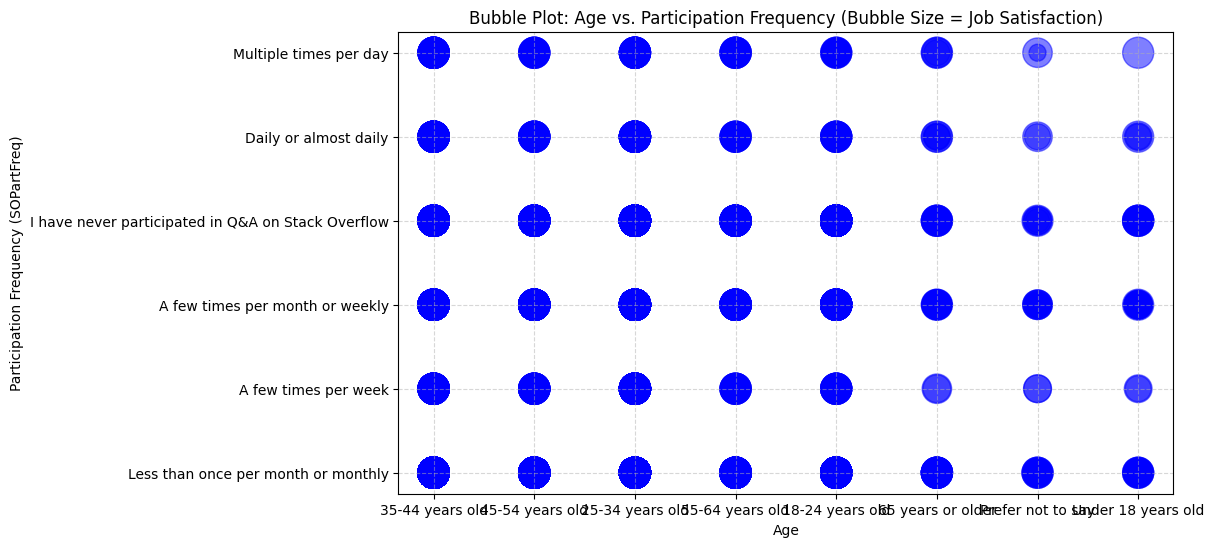

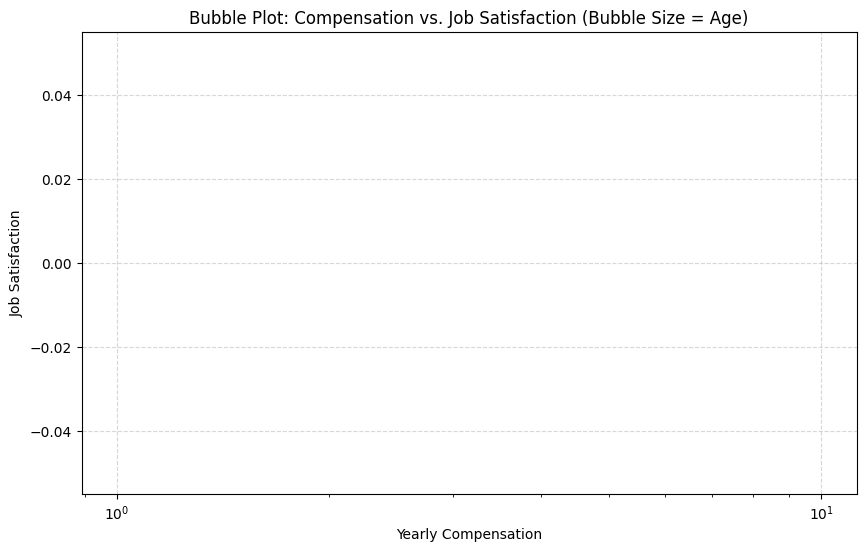

In [16]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Connect to the SQLite database
# # conn = sqlite3.connect('survey-results-public.sqlite')

# Charger les données
# QUERY = "SELECT * FROM main"
# df = pd.read_sql_query(QUERY, conn)

### 1. Bubble Plot : Âge vs. Fréquence de participation, avec Job Satisfaction ###
if {'Age', 'SOPartFreq', 'JobSat'}.issubset(df.columns):
    df_filtered = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

    # Normaliser la taille des bulles pour Job Satisfaction
    df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')
    bubble_size = (df_filtered['JobSat'] - df_filtered['JobSat'].min()) / (df_filtered['JobSat'].max() - df_filtered['JobSat'].min()) * 500

    # Tracer le bubble plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['Age'], df_filtered['SOPartFreq'], s=bubble_size, alpha=0.5, color='blue')

    plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')
    plt.xlabel('Age')
    plt.ylabel('Participation Frequency (SOPartFreq)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('Age', 'SOPartFreq', 'JobSat') sont absentes.")

### 2. Bubble Plot : Compensation vs. Satisfaction, avec Âge ###
if {'ConvertedCompYearly', 'JobSat', 'Age'}.issubset(df.columns):
    df_filtered = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

    # Normaliser la taille des bulles pour l'Âge
    df_filtered['Age'] = pd.to_numeric(df_filtered['Age'], errors='coerce')
    bubble_size = (df_filtered['Age'] - df_filtered['Age'].min()) / (df_filtered['Age'].max() - df_filtered['Age'].min()) * 500

    # Tracer le bubble plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSat'], s=bubble_size, alpha=0.5, color='green')

    plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
    plt.xlabel('Yearly Compensation')
    plt.ylabel('Job Satisfaction')
    plt.xscale('log')  # Compensation très variable, échelle log recommandée
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('ConvertedCompYearly', 'JobSat', 'Age') sont absentes.")

# Fermer la connexion
conn.close()


### Task 2: Analyzing Relationships Using Bubble Plots
1. Bubble Plot of Technology Preferences by Age
Visualize the popularity of programming languages respondents have worked with (LanguageHaveWorkedWith) across age groups.

Use bubble size to represent the frequency of each language.

##Write your code here
2. Bubble Plot for Preferred Databases vs. Job Satisfaction
Explore the relationship between preferred databases (DatabaseWantToWorkWith) and job satisfaction.

Use bubble size to indicate the number of respondents for each database.

<ipython-input-22-67c3c83254ff>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_counts = df_exploded.groupby(['AgeGroup', 'Language']).size().reset_index(name='Count')


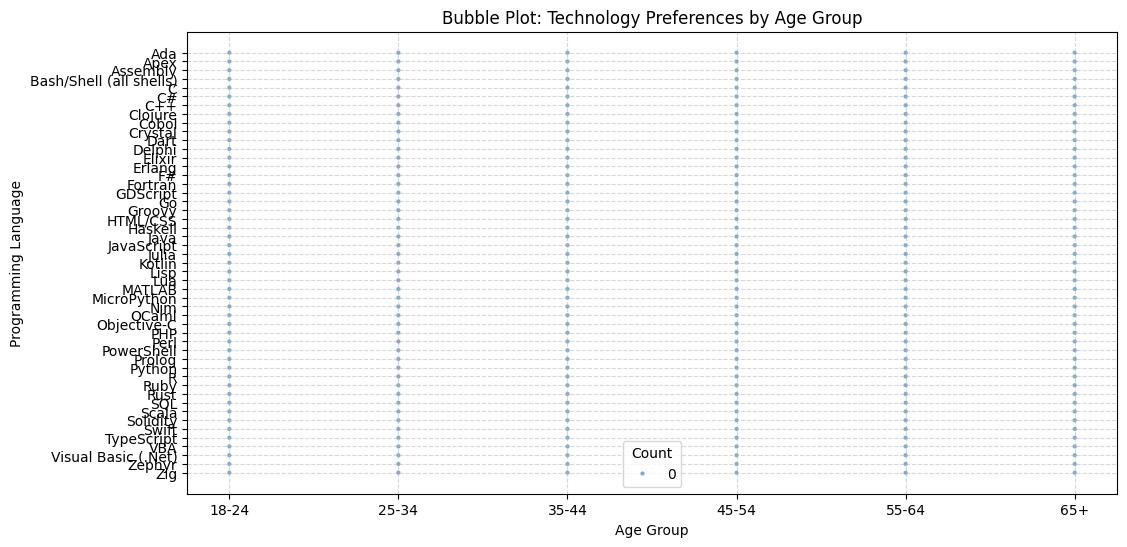

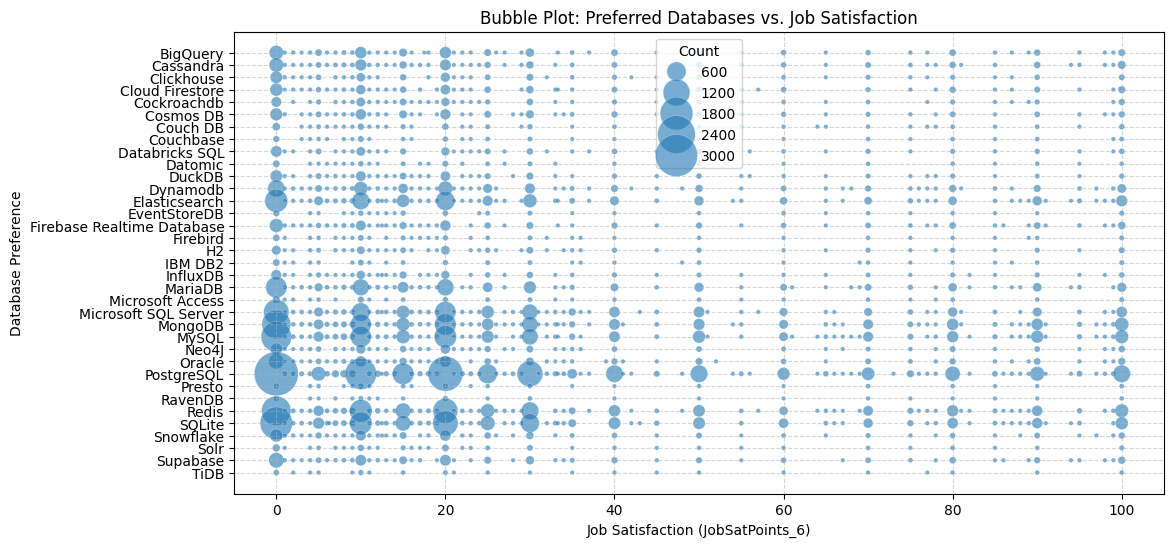

In [22]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
# conn = sqlite3.connect('survey-results-public.sqlite')
# Charger les données
# QUERY = "SELECT * FROM main"
# df = pd.read_sql_query(QUERY, conn)

# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

### 1. Bubble Plot : Préférences technologiques par tranche d'âge ###
if {'LanguageHaveWorkedWith', 'Age'}.issubset(df.columns):
    df_filtered = df[['LanguageHaveWorkedWith', 'Age']].dropna()

    # Convertir l'âge en catégories (groupes d'âge)
    # Convertir l'âge en nombre (pour éviter l'erreur)
    df_filtered['Age'] = pd.to_numeric(df_filtered['Age'], errors='coerce')

    bins = [18, 25, 35, 45, 55, 65,100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_filtered['AgeGroup'] = pd.cut(df_filtered['Age'], bins=bins, labels=labels, right=False)

    # Extraire les langages et compter leur fréquence par groupe d'âge
    df_exploded = df_filtered.assign(Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
    lang_counts = df_exploded.groupby(['AgeGroup', 'Language']).size().reset_index(name='Count')

    # Tracer le bubble plot
    plt.figure(figsize=(12, 6))
    bubble_size = lang_counts['Count'] * 10  # Ajustement pour visibilité

    sns.scatterplot(data=lang_counts, x='AgeGroup', y='Language', size='Count', sizes=(10, 1000), alpha=0.6)

    plt.title('Bubble Plot: Technology Preferences by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Programming Language')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('LanguageHaveWorkedWith' ou 'Age') sont absentes.")

### 2. Bubble Plot : Bases de données préférées vs. Satisfaction au travail ###
if {'DatabaseWantToWorkWith', 'JobSatPoints_6'}.issubset(df.columns):
    df_filtered = df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].dropna()

    # Extraire les bases de données et compter leur fréquence par satisfaction
    df_exploded = df_filtered.assign(Database=df_filtered['DatabaseWantToWorkWith'].str.split(';')).explode('Database')
    db_counts = df_exploded.groupby(['JobSatPoints_6', 'Database']).size().reset_index(name='Count')

    # Tracer le bubble plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=db_counts, x='JobSatPoints_6', y='Database', size='Count', sizes=(10, 1000), alpha=0.6)

    plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
    plt.xlabel('Job Satisfaction (JobSatPoints_6)')
    plt.ylabel('Database Preference')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('DatabaseWantToWorkWith' ou 'JobSatPoints_6') sont absentes.")

# Fermer la connexion
conn.close()


## Task 3: Comparing Data Using Bubble Plots
1. Bubble Plot for Compensation Across Developer Roles
Visualize compensation (ConvertedCompYearly) across different developer roles (DevType).

Use bubble size to represent job satisfaction.


2. Bubble Plot for Collaboration Tools by Age
Visualize the relationship between the collaboration tools used (NEWCollabToolsHaveWorkedWith) and age groups.

Use bubble size to represent the frequency of tool usage.

In [23]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connexion à la base SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# Charger les données
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

### 1. Bubble Plot : Compensation par rôle de développeur ###
if {'ConvertedCompYearly', 'DevType', 'JobSatPoints_6'}.issubset(df.columns):
    df_filtered = df[['ConvertedCompYearly', 'DevType', 'JobSatPoints_6']].dropna()

    # Extraire les rôles de développeur
    df_exploded = df_filtered.assign(Role=df_filtered['DevType'].str.split(';')).explode('Role')

    # Regrouper par rôle et calculer la médiane de la compensation et la satisfaction moyenne
    role_stats = df_exploded.groupby('Role').agg(
        MedianComp=('ConvertedCompYearly', 'median'),
        AvgJobSat=('JobSatPoints_6', 'mean'),
        Count=('Role', 'count')
    ).reset_index()

    # Tracer le bubble plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=role_stats, x='Role', y='MedianComp', size='AvgJobSat', sizes=(10, 1000), alpha=0.6)

    plt.title('Bubble Plot: Compensation Across Developer Roles')
    plt.xlabel('Developer Role')
    plt.ylabel('Median Compensation (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Compensation varie beaucoup -> échelle logarithmique
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('ConvertedCompYearly', 'DevType' ou 'JobSatPoints_6') sont absentes.")

### 2. Bubble Plot : Outils collaboratifs par tranche d'âge ###
if {'NEWCollabToolsHaveWorkedWith', 'Age'}.issubset(df.columns):
    df_filtered = df[['NEWCollabToolsHaveWorkedWith', 'Age']].dropna()

    # Catégorisation de l'âge
    bins = [18, 25, 35, 45, 55, 65, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_filtered['AgeGroup'] = pd.cut(df_filtered['Age'], bins=bins, labels=labels, right=False)

    # Extraction des outils collaboratifs et comptage de la fréquence
    df_exploded = df_filtered.assign(Tool=df_filtered['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
    tool_counts = df_exploded.groupby(['AgeGroup', 'Tool']).size().reset_index(name='Count')

    # Tracer le bubble plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=tool_counts, x='AgeGroup', y='Tool', size='Count', sizes=(10, 1000), alpha=0.6)

    plt.title('Bubble Plot: Collaboration Tools by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Collaboration Tool')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Les colonnes nécessaires ('NEWCollabToolsHaveWorkedWith' ou 'Age') sont absentes.")

# Fermer la connexion
conn.close()


--2025-02-05 21:17:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.12’

survey-results-publ 100%[===================>] 201.62M  12.1MB/s    in 15s     

2025-02-05 21:17:59 (13.0 MB/s) - ‘survey-results-public.sqlite.12’ saved [211415040/211415040]



DatabaseError: Execution failed on sql 'SELECT * FROM main': no such table: main

### Task 4: Visualizing Technology Trends Using Bubble Plots     1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction
1. Explore the relationship between preferred web frameworks (WebframeWantToWorkWith) and job satisfaction.

Use bubble size to represent the number of respondents.

2. Bubble Plot for Admired Technologies Across Countries
Visualize the distribution of admired technologies (LanguageAdmired) across different countries (Country).

Use bubble size to represent the frequency of admiration.

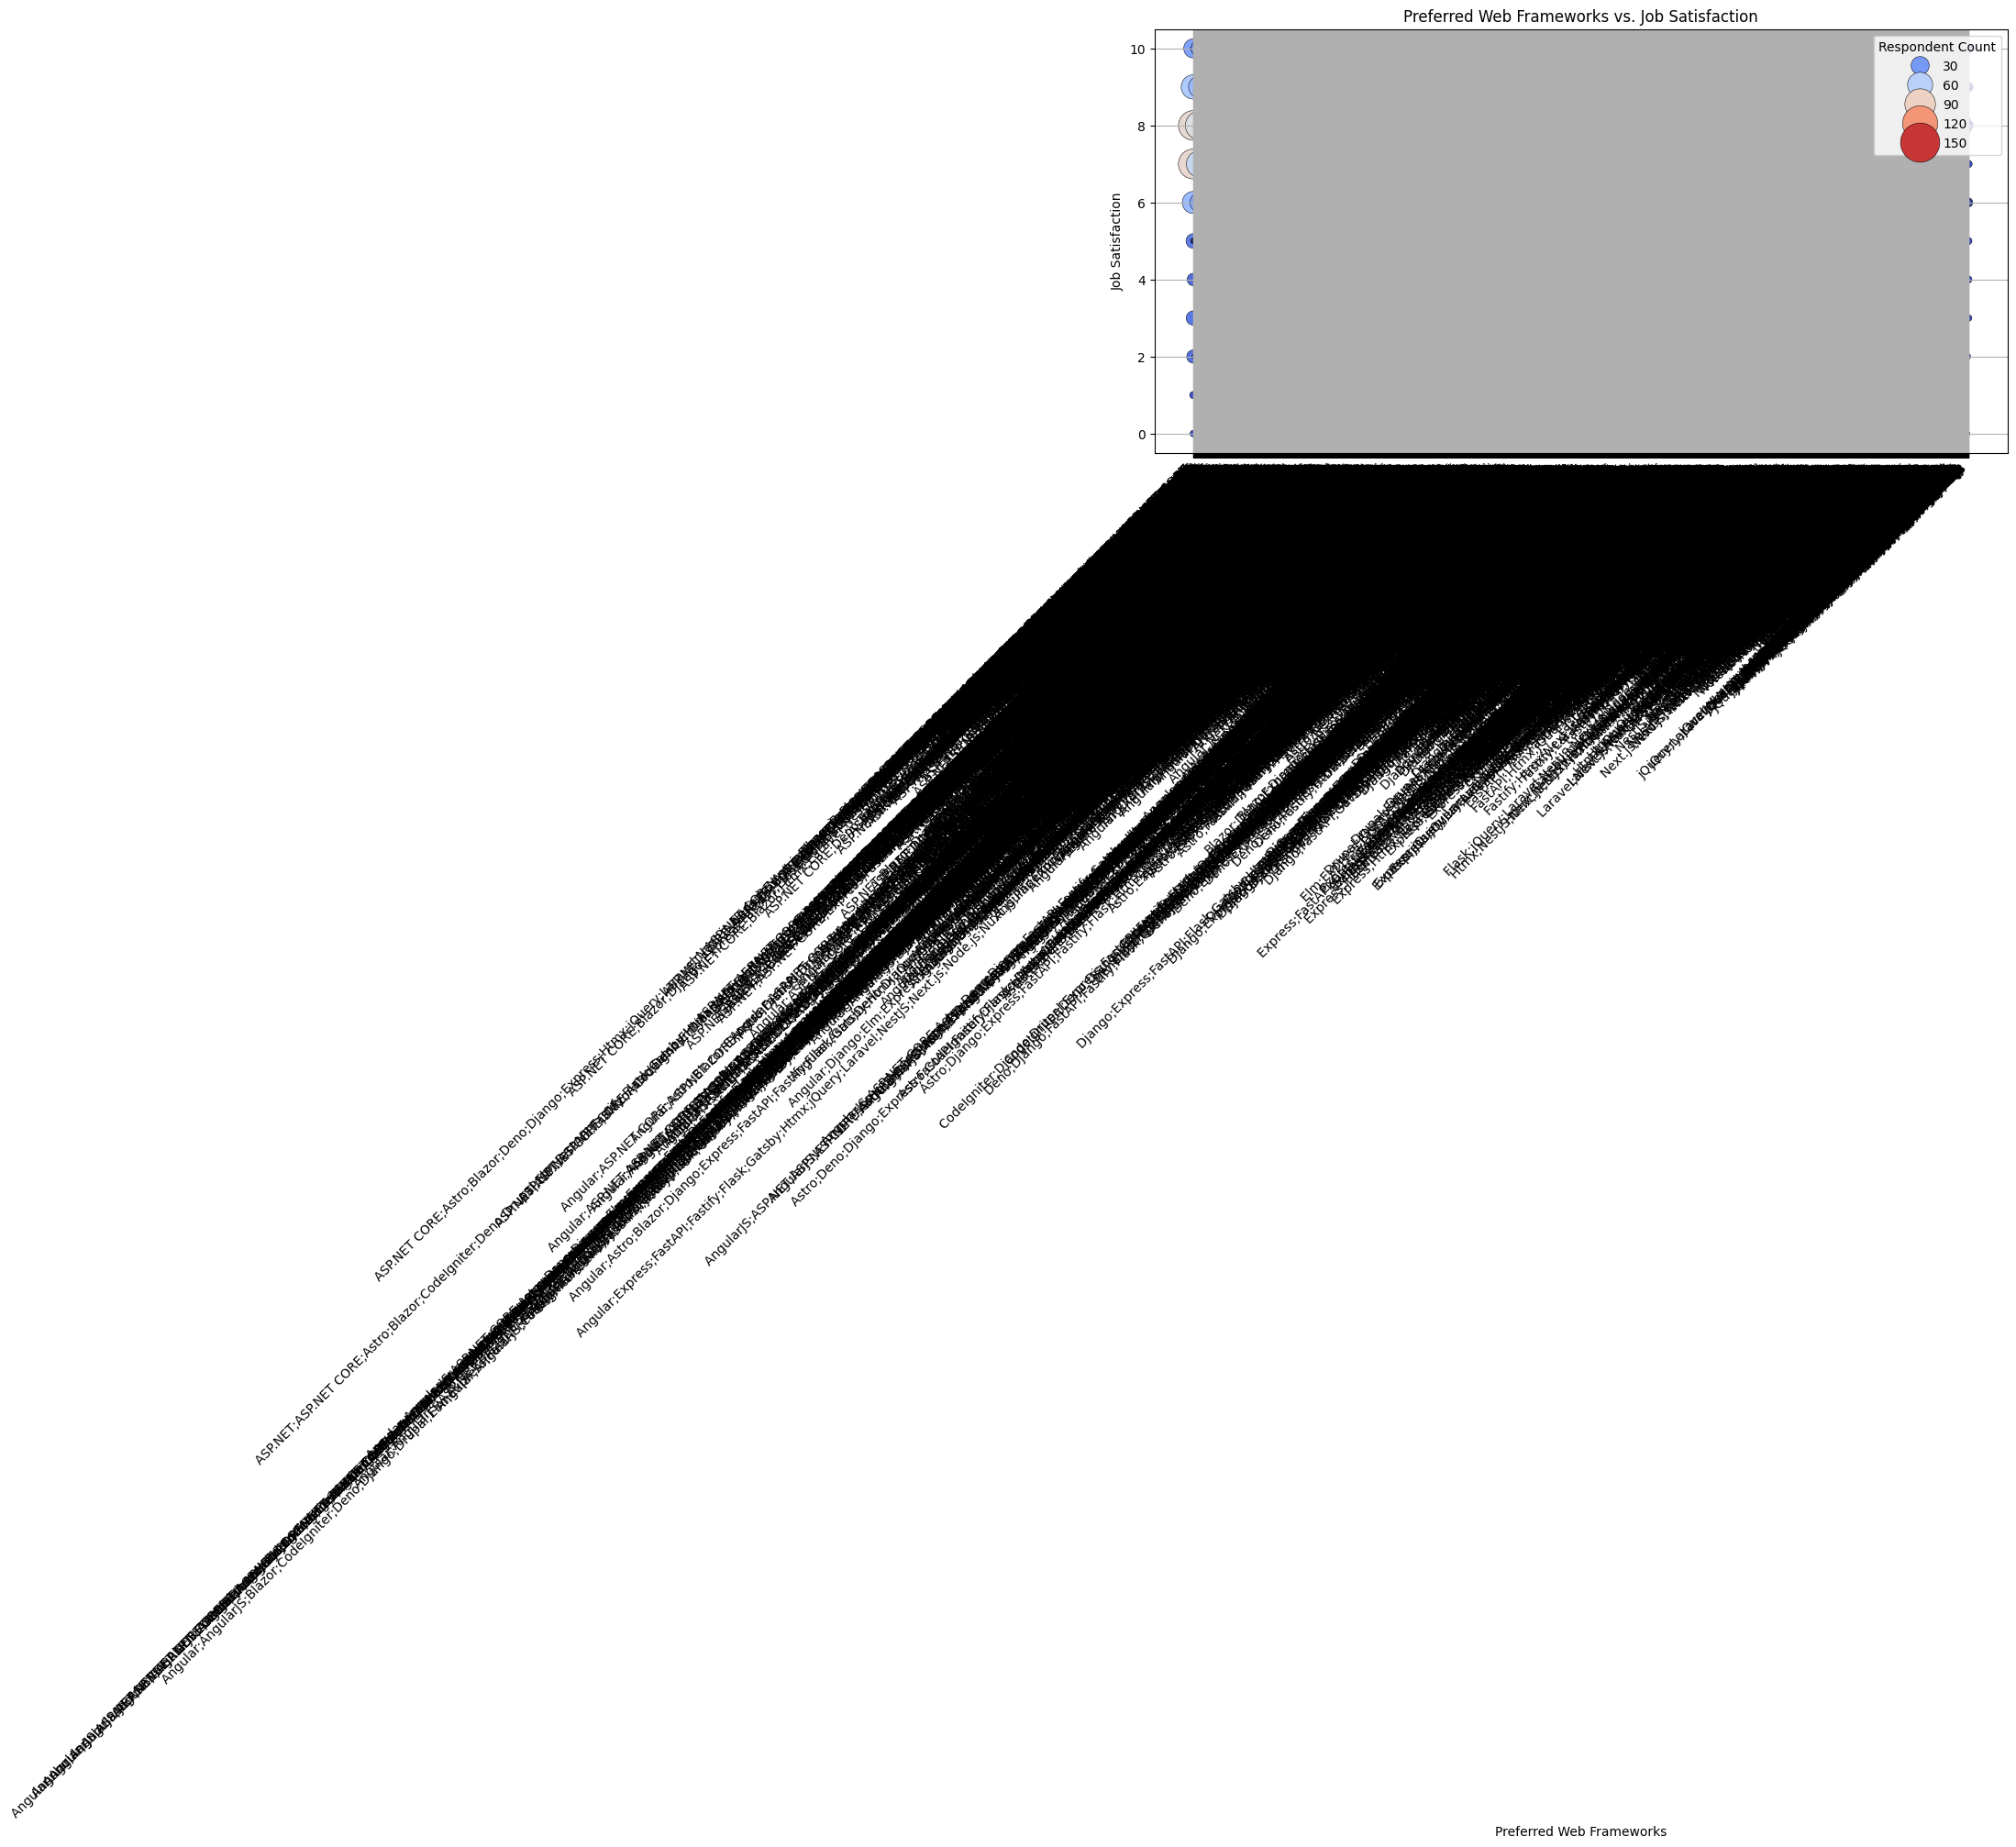

KeyboardInterrupt: 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

#1. Explore the relationship between preferred web frameworks (WebframeWantToWorkWith) and job satisfaction.

# Group data by web frameworks and job satisfaction
framework_satisfaction = df.groupby(["WebframeWantToWorkWith", "JobSat"]).size().reset_index(name="Count")

# Plot bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=framework_satisfaction,
    x="WebframeWantToWorkWith",
    y="JobSat",
    size="Count",
    hue="Count",
    palette="coolwarm",
    sizes=(20, 1000),
    edgecolor="black"
)

plt.xticks(rotation=45, ha="right")
plt.title("Preferred Web Frameworks vs. Job Satisfaction")
plt.xlabel("Preferred Web Frameworks")
plt.ylabel("Job Satisfaction")
plt.legend(title="Respondent Count", loc="upper right")
plt.grid(True)
plt.show()

# 2. Bubble Plot for Admired Technologies Across Countries

# Group data by country and admired languages
admired_languages = df.groupby(["Country", "LanguageAdmired"]).size().reset_index(name="Count")

# Plot bubble chart
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=admired_languages,
    x="Country",
    y="LanguageAdmired",
    size="Count",
    hue="Count",
    palette="viridis",
    sizes=(20, 1000),
    edgecolor="black"
)

plt.xticks(rotation=90, ha="right")
plt.title("Admired Technologies Across Countries")
plt.xlabel("Country")
plt.ylabel("Admired Technology")
plt.legend(title="Admiration Count", loc="upper right")
plt.grid(True)
plt.show()




### Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.

##Summary
- After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.